# Central Limit Theorem and Confidence Intervals
- See how sampling distribution behaves
- Evaluate confidence intervals

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 5)

In [129]:
def get_samples(data, sample_size=50, n_samples=100):
    return (np.random.choice(data, size=sample_size, replace=True) for _ in range(n_samples))

def get_sampling_distribution(data, statistic, sample_size=50, n_samples=100):
    return [statistic(sample) for sample in get_samples(data, sample_size=sample_size, n_samples=n_samples)]

def get_confidence_interval(sample, statistic, confidence=.95):
    z_score = st.norm.ppf(confidence + (1 - confidence) / 2)
    ci_low = np.mean(sample) - z_score * np.std(sample) / len(sample)**0.5
    ci_high = np.mean(sample) + z_score * np.std(sample) / len(sample)**0.5
    return ci_low, ci_high

### Generate data

Population mean: 4.48093106959
Population std: 4.28399334231


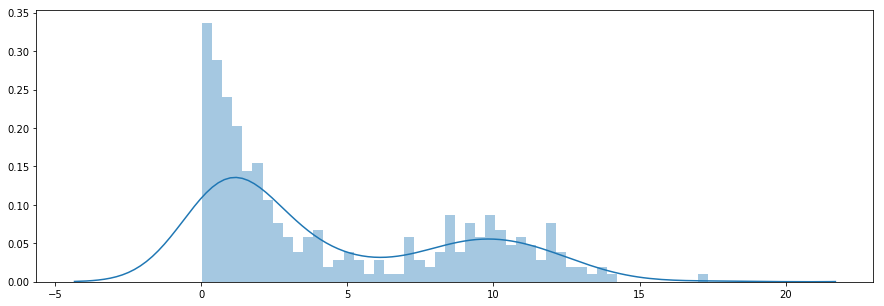

In [150]:
data = np.concatenate([np.random.exponential(2, size=200), np.random.normal(10, 2, size=100)])
np.random.shuffle(data)

print("Population mean:", np.mean(data))
print("Population std:", np.std(data))

sns.distplot(data, bins=50)
plt.show()

## I. Mean
- Look at the sampling distribution for the mean
- See how SE behaves with increasing sample size

### 1. Sampling distribution for mean
- Sampling and collecting the mean of each sample

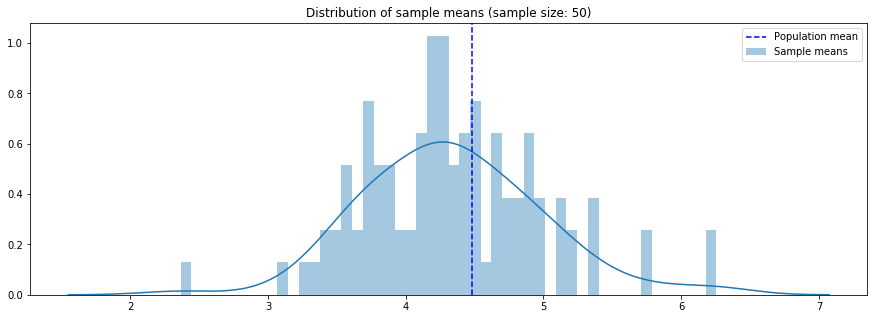

In [151]:
sample_size = 50

means = get_sampling_distribution(data, np.mean, sample_size=sample_size, n_samples=100)
plt.title("Distribution of sample means (sample size: {})".format(sample_size))
sns.distplot(means, bins=50, label="Sample means")
plt.axvline(x=np.mean(data), color='b', linestyle='--', label="Population mean")
plt.legend()
plt.show()

### 2. Sampling distribution of means for varying sample sizes
- Given a sample size, sample and plot distribution of means
- Variance of sampling distribution reduces the larger the sample size gets

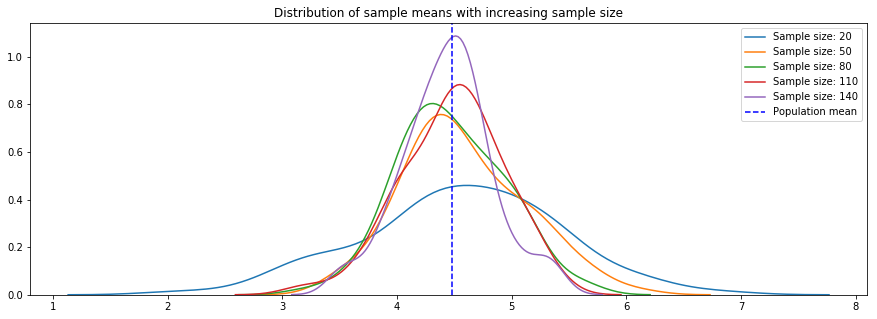

In [152]:
sample_size_range = range(20, 150, 30)

plt.title("Distribution of sample means with increasing sample size")
for sample_size in sample_size_range:
    means = get_sampling_distribution(data, np.mean, sample_size=sample_size, n_samples=100)
    sns.distplot(means, bins=50, label="Sample size: {}".format(sample_size), hist=False)
plt.axvline(x=np.mean(data), color='b', linestyle='--', label="Population mean")
plt.legend()
plt.show()

### 3. Standard error with varying sample sizes
- Compute the std for each sampling distribution
- Plot the estimated SE derived from first sample

$$ SE = \frac{s}{\sqrt{n}} $$

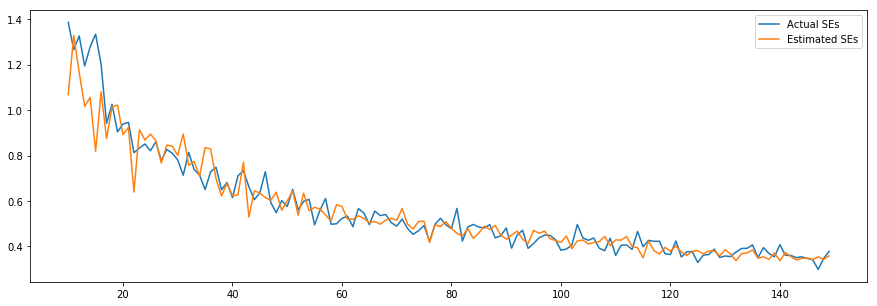

R2 score: 0.8882


In [155]:
sample_size_range = range(10, 150)

standard_errors = []
est_ses = []
for sample_size in sample_size_range:
    samples = list(get_samples(data, sample_size=sample_size, n_samples=100))
    means = [np.mean(sample) for sample in samples]               
    standard_errors.append(np.std(means))
    est_ses.append(np.std(samples[0]) / (sample_size)**0.5)
    
plt.plot(sample_size_range, standard_errors, label="Actual SEs")
plt.plot(sample_size_range, est_ses, label="Estimated SEs")
plt.legend()
plt.show()

print("R2 score: {:.4f}".format(r2_score(standard_errors, est_ses)))

## II. Confidence Intervals
- For a confidence level of 95%, 95% of confidence intervals built from samples will contain the true population mean

$$ CI = \Bigg[ \bar{x} - z \frac{s}{\sqrt{n}},\ \ \bar{x} + z \frac{s}{\sqrt{n}} \Bigg] $$

### 1. Plot CI given sample

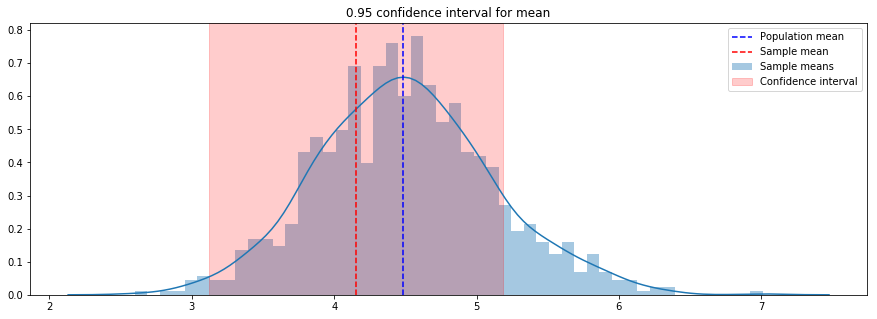

In [156]:
sample_size = 50
confidence = .95


sample = next(get_samples(data, sample_size=sample_size, n_samples=1))
ci_low, ci_high = get_confidence_interval(sample, np.mean, confidence=confidence)
sample_means = get_sampling_distribution(data, np.mean, sample_size=sample_size, n_samples=1000)

plt.title("{} confidence interval for mean".format(confidence))
sns.distplot(sample_means, bins=50, label="Sample means")
plt.axvspan(ci_low, ci_high, label="Confidence interval", color="red", alpha=0.2)
plt.axvline(x=np.mean(data), color='b', linestyle='--', label="Population mean")
plt.axvline(x=np.mean(sample), color='r', linestyle='--', label="Sample mean")
plt.legend()
plt.show()

### 2. Evaluate Confidence Interval
- Compute CI for each sample, see how often true stat lies in CI
- See if same as confidence level

In [149]:
sample_size = 50
confidence = .95
n_samples = 1000

mean = np.mean(data)
hits = 0
for sample in get_samples(data, sample_size=sample_size, n_samples=n_samples):
    ci_low, ci_high = get_confidence_interval(sample, np.mean, confidence=confidence)
    if ci_low <= mean <= ci_high:
        hits += 1

print("Accuracy of confidence intervals: {:.4f}".format(hits/n_samples))

Accuracy of confidence intervals: 0.9490
